#**Chi-Square Test of Independence**

## **The Scenario**
A university's Academic Support Team introduces a new time management workshop, encouraging students to increase their study hours. Faculty members are optimistic that the initiative will improve academic confidence among students. However, the Student Affairs Office is unsure whether extended study hours actually correlate with students feeling more confident before exams.

**To find out, they conducted a survey with 250 students, collecting responses on how much they study and how confident they feel about upcoming exams.**

## **Importing the Necessary Libraries and Data**

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from google.colab import drive
drive.mount('/content/drive')


# Reading the excel file from Google Drive
data_root = ('/content/drive/MyDrive/Colab Notebooks/Project 3')  # This path will need to be modified based on the dataset's location
dataset_path = os.path.join(data_root, 'Student_Study_vs_Confidence_250.xlsx')
dfm = pd.read_excel(dataset_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Print data head
dfm.head()

,Student ID,Study Hours,Exam Confidence
0,1,Very High,Very Confident
1,2,Very High,Unconfident
2,3,High,Very Unconfident
3,4,Very High,Confident
4,5,Very High,Neutral


In [5]:
# The Pandas crosstab function can be used to produce the contingency table from the raw data of responses
dfm_crosstab = pd.crosstab(dfm["Study Hours"],dfm["Exam Confidence"])
dfm_crosstab

Exam Confidence,Confident,Neutral,Unconfident,Very Confident,Very Unconfident
Study Hours,,,,,
High,11,8,15,10,10
Low,13,8,9,4,10
Medium,5,16,9,8,10
Very High,12,7,16,13,10
Very Low,8,5,16,9,8


In [11]:
# Sort the dataframe according to following lists to make it easier to read
sorter = ["Very High","High","Medium","Low","Very Low"]
sorter2 = ["Very Confident","Confident","Neutral","Unconfident","Very Unconfident"]

# Sort dataframe
dfm_crosstab = dfm_crosstab.loc[sorter] # Sorts the rows [Study Hours]
dfm_crosstab = dfm_crosstab[sorter2] # Sorts the columns [Exam Confidence]
dfm_crosstab

Exam Confidence,Very Confident,Confident,Neutral,Unconfident,Very Unconfident
Study Hours,,,,,
Very High,13,12,7,16,10
High,10,11,8,15,10
Medium,8,5,16,9,10
Low,4,13,8,9,10
Very Low,9,8,5,16,8


In [12]:
# Print contingency table with cells coloured according to magnitude
dfm_crosstab.style.background_gradient(cmap='Blues',vmin = 0,vmax = 100)

Exam Confidence,Very Confident,Confident,Neutral,Unconfident,Very Unconfident
Study Hours,,,,,
Very High,13,12,7,16,10
High,10,11,8,15,10
Medium,8,5,16,9,10
Low,4,13,8,9,10
Very Low,9,8,5,16,8


## **Create Contingency Table**

In [14]:
# Create contingency table in proportions using "normalize=True" in crosstab function
dfm_proportions = pd.crosstab(dfm["Study Hours"],dfm["Exam Confidence"],normalize=True)

# Sort dataframe
dfm_proportions = dfm_proportions.loc[sorter]
dfm_proportions = dfm_proportions[sorter2]

# Print contingency table with cells coloured according to magnitude
dfm_proportions.style.background_gradient(cmap='Blues',vmin = 0,vmax = 0.2)

Exam Confidence,Very Confident,Confident,Neutral,Unconfident,Very Unconfident
Study Hours,,,,,
Very High,0.052000,0.048000,0.028000,0.064000,0.040000
High,0.040000,0.044000,0.032000,0.060000,0.040000
Medium,0.032000,0.020000,0.064000,0.036000,0.040000
Low,0.016000,0.052000,0.032000,0.036000,0.040000
Very Low,0.036000,0.032000,0.020000,0.064000,0.032000


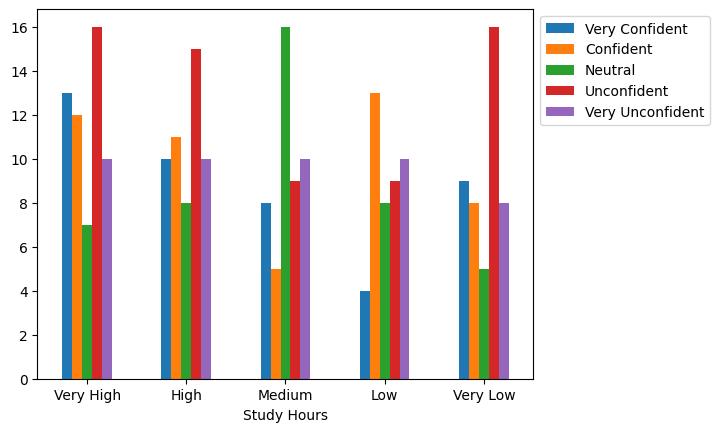

In [21]:
# Plotting clustered bar chart to visualize
dfm_crosstab.plot.bar(rot=0)
#plt.xticks(rotation=90)

# Moving legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## **Setting up the Hypothesis**

**Our goal is to examine the claim that the duration spent studying affects the confidence of students to perform well in their exams.**Therefore, the null and alternative hypotheses can be formulated as follows:

- H0: **Study Hours are not associated with Exam Confidence**
- H1: **Study Hours are associated with Exam Confidence**
    
The significance level alpha is set to 0.05.

We can now run the test.

## **Why Chi-square Test of Independence?**

In this scenario, both "Study Hours" and "Exam Confidence" are categorical variables measured on an ordinal scale. To determine whether there is a statistically significant association between how much students study and how confident they feel about exams, the **Chi-Square Test of Independence** is appropriate. This test helps assess whether the distribution of exam confidence levels differs meaningfully across categories of study hours, allowing us to evaluate if the two variables are related or independent of each other.

In [22]:
# Store the output of the test function into variables
# df_crosstab = pd.crosstab(dfm["Study Hours"],dfm["Exam Confidence"])
stat, p, dof, expected = chi2_contingency(dfm_crosstab, correction=False)

In [23]:
# Print results
print("chi2: " + str(stat))
print("p: " + str(p))
print("df: " + str(dof))
print("expected: " + str(expected))

chi2: 19.90210345352478
p: 0.2246622768589029
df: 16
expected: [[10.208 11.368 10.208 15.08  11.136]
 [ 9.504 10.584  9.504 14.04  10.368]
 [ 8.448  9.408  8.448 12.48   9.216]
 [ 7.744  8.624  7.744 11.44   8.448]
 [ 8.096  9.016  8.096 11.96   8.832]]


## **Interpreting the Output**

**The p-value (0.2247) exceeds the pre-established alpha of 0.05. This leads us not to reject the null hypothesis—suggesting no significant link between the duration students spend studying and how confident they feel during exams at a significance level of 0.05.**